7.3557968814647285 -0.14671167678905


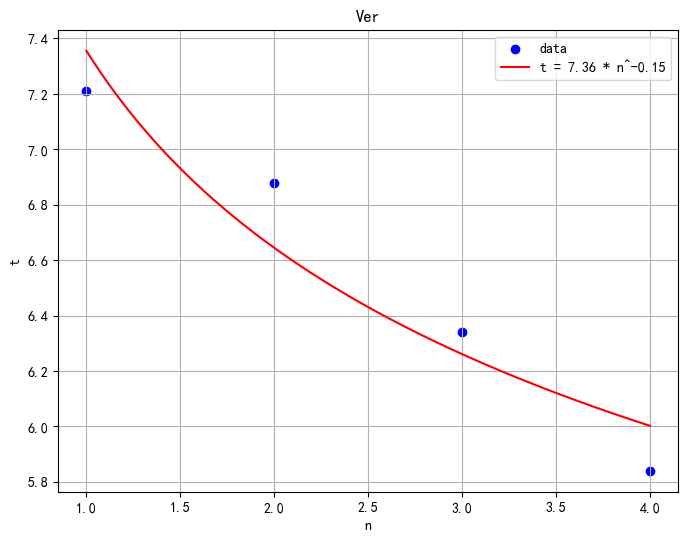

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ln(x,y):
    d = []
    x0=[]
    y0=[]
    for i in range(len(x)):
        if y[i]>=0:
            d.append(i)

    for i in d:
        x0.append(np.log(x[i]))
        y0.append(np.log(y[i]))

    return x0,y0


def s(x,y):
    n=len(x)
    sumxy=0
    for i in range(n):
        sumxy = sumxy + x[i]*y[i]
    sumx=0
    for i in range(n):
        sumx = sumx + x[i]
    sumy=0
    for i in range(n):
        sumy = sumy +y[i]
    sumx2=0
    for i in range(n):
        sumx2 = sumx2 + x[i]*x[i]
    
    k = (n*sumxy-sumx*sumy)/(n*sumx2-sumx*sumx)
    b = (sumy-k*sumx)/n

    return k,b


def tran(k,b):
    k = k
    b = np.exp(b)
    return k,b

    

x=[1,2,3,4]
y=[7.21,6.88,6.34,5.84]

lnx,lny=ln(x,y)
k,b=s(lnx,lny)
k,b=tran(k,b)

print(b,k)

# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='data')  # 绘制散点图

# 生成拟合曲线
x_fit = np.linspace(min(x), max(x), 400)
y_fit = b * (x_fit ** k)

plt.plot(x_fit, y_fit, color='red', label=f't = {b:.2f} * n^{k:.2f}')  # 绘制拟合曲线

plt.xlabel('n')
plt.ylabel('t')
plt.title('Ver')
plt.legend()
plt.grid(True)
plt.show()


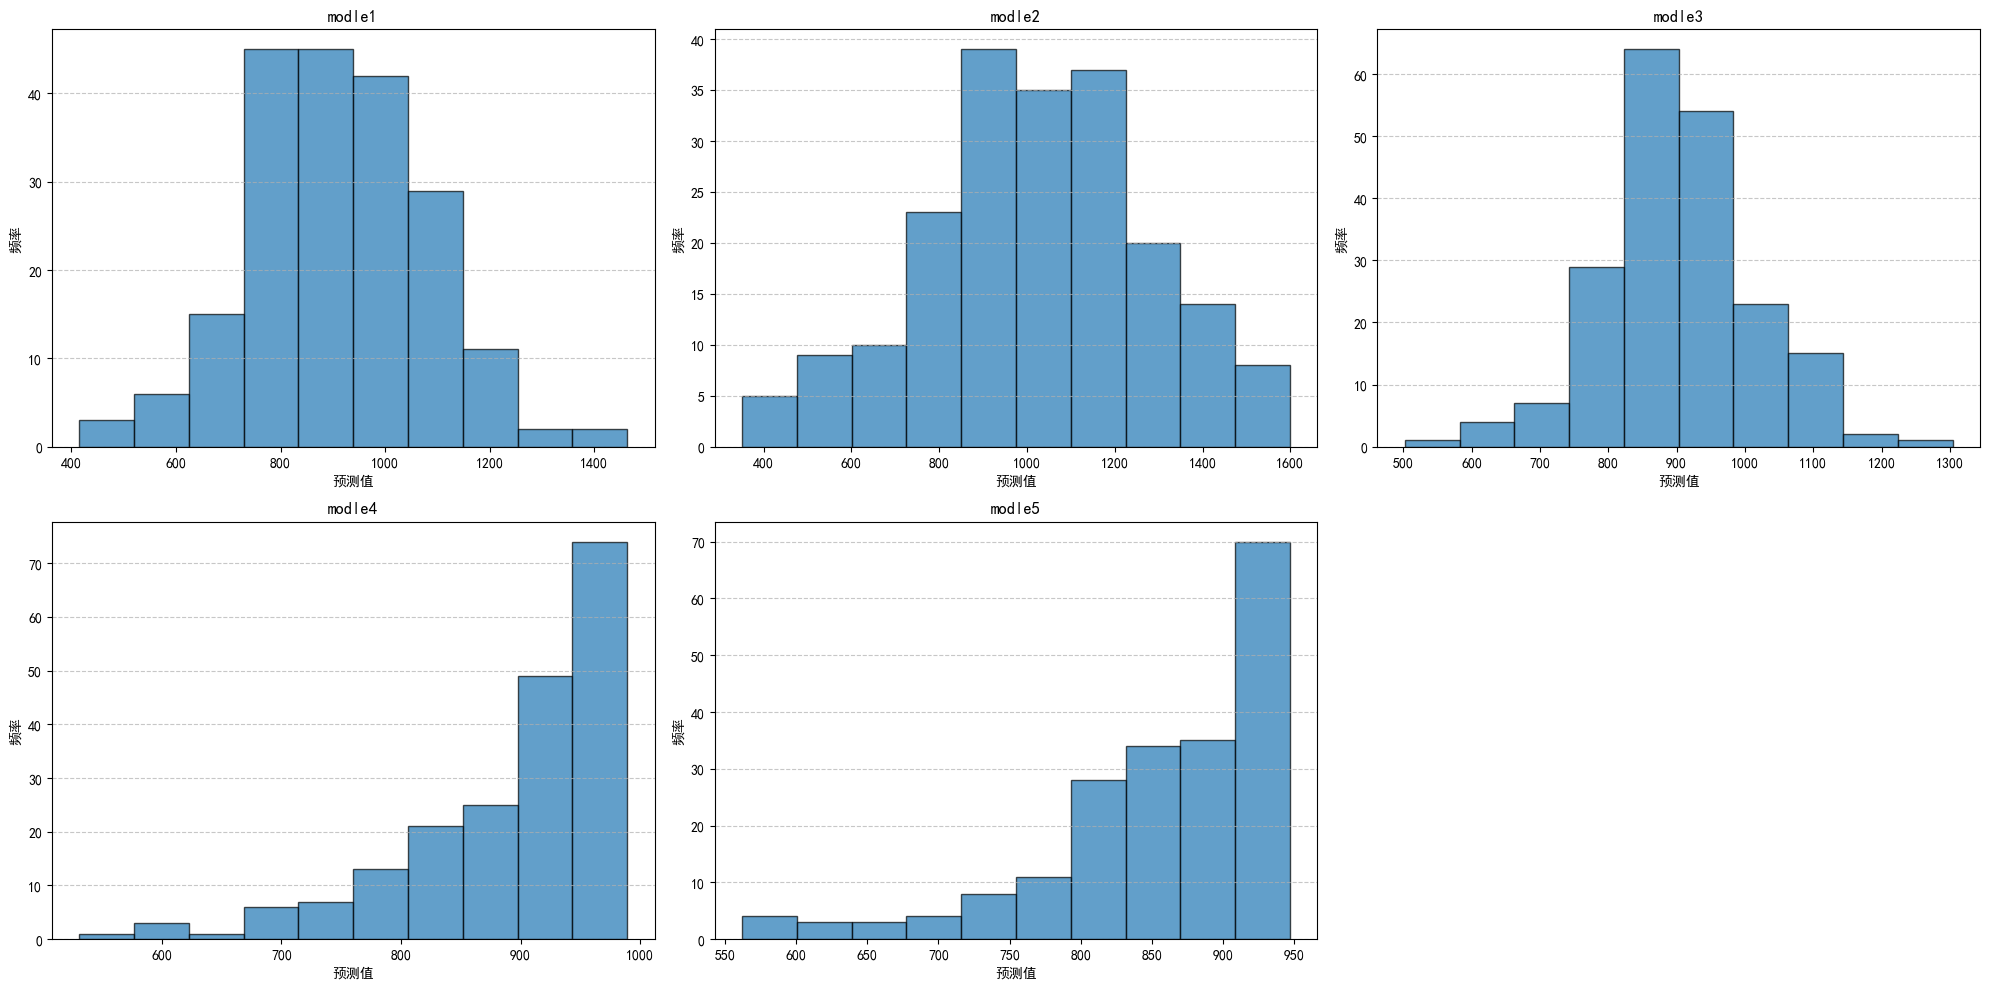

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号


def sc(maxx, minn, i):
    N = maxx
    o = minn
    x = [random.randint(o, N) for _ in range(i)]
    for i in range(len(x)):
        x[i] = x[i] - 100
    return x


def modle1(x):
    return int(2 * sum(x) / len(x) - 1)


def modle2(x):
    for i in range(len(x)):
        for j in range(len(x)):
            if x[i] < x[j]:
                k = x[i]
                x[i] = x[j]
                x[j] = k

    return 2 * x[int(len(x) / 2)] - 1


def modle3(x):
    m = max(x)
    n = min(x)

    return m + n - 1


def modle4(x):
    return int((1 + 1 / len(x)) * max(x)) - 1


def modle5(x):
    return int((1 + 1 / (2 * len(x) - 1)) * (max(x) - 1 / (2 * len(x))))


# 样本一共 N 个，minn 指代最小（101），n 是指一共抽样几个进行预测
# k 是一共进行几次预测
def tuu1(N, minn, n, k):
    d = []
    for i in range(k):
        x = sc(N, minn, n)
        d.append(modle1(x))

    return d


def tuu2(N, minn, n, k):
    d = []
    for i in range(k):
        x = sc(N, minn, n)
        d.append(modle2(x))

    return d


def tuu3(N, minn, n, k):
    d = []
    for i in range(k):
        x = sc(N, minn, n)
        d.append(modle3(x))

    return d


def tuu4(N, minn, n, k):
    d = []
    for i in range(k):
        x = sc(N, minn, n)
        d.append(modle4(x))

    return d


def tuu5(N, minn, n, k):
    d = []
    for i in range(k):
        x = sc(N, minn, n)
        d.append(modle5(x))

    return d


# 样本一共 N 个，minn 指代最小（101），n 是指一个样本抽样几个，k 是取几个样本/做几次预测
def huatu(N, minn, n, k):
    # 创建一个 2x3 的画布
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))

    # 存储每个 k 对应的预测值
    results1 = tuu1(N, minn, n, k)
    # 绘制直方图 1
    axes[0, 0].hist(results1, bins=10, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('modle1')
    axes[0, 0].set_xlabel('预测值')
    axes[0, 0].set_ylabel('频率')
    axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # 存储每个 k 对应的预测值
    results2 = tuu2(N, minn, n, k)
    # 绘制直方图 2
    axes[0, 1].hist(results2, bins=10, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('modle2')
    axes[0, 1].set_xlabel('预测值')
    axes[0, 1].set_ylabel('频率')
    axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

    # 存储每个 k 对应的预测值
    results3 = tuu3(N, minn, n, k)
    # 绘制直方图 3
    axes[0, 2].hist(results3, bins=10, edgecolor='black', alpha=0.7)
    axes[0, 2].set_title('modle3')
    axes[0, 2].set_xlabel('预测值')
    axes[0, 2].set_ylabel('频率')
    axes[0, 2].grid(axis='y', linestyle='--', alpha=0.7)

    # 存储每个 k 对应的预测值
    results4 = tuu4(N, minn, n, k)
    # 绘制直方图 4
    axes[1, 0].hist(results4, bins=10, edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('modle4')
    axes[1, 0].set_xlabel('预测值')
    axes[1, 0].set_ylabel('频率')
    axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # 存储每个 k 对应的预测值
    results5 = tuu5(N, minn, n, k)
    # 绘制直方图 5
    axes[1, 1].hist(results5, bins=10, edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('modle5')
    axes[1, 1].set_xlabel('预测值')
    axes[1, 1].set_ylabel('频率')
    axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

    # 隐藏最后一个子图的坐标轴
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()


huatu(1000, 101, 10, 200)
    

拟合参数: [-0.0314207  0.2918871]


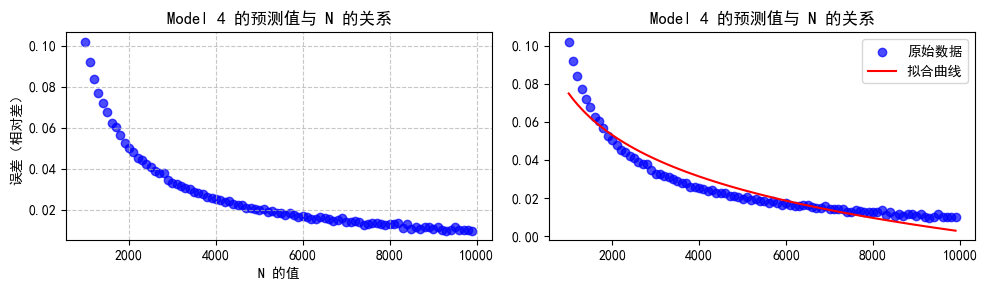

In [10]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.optimize import curve_fit

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号


def sc(maxx, minn, i):
    N = maxx
    o = minn
    x = [random.randint(o, N) for _ in range(i)]
    for i in range(len(x)):
        x[i] = x[i] - 100
    return x


def modle4(x):
    return int((1 + 1 / len(x)) * max(x)) - 1


# 样本一共 N 个，minn 指代最小（101），n 是指一共抽样几个进行预测
# k 是一共进行几次预测
def tu4(N, minn, n, k):
    d = []
    for i in range(k):
        x = sc(N, minn, n)
        d.append(modle4(x))

    ave = 0
    for i in range(len(d)):
        ave = ave + d[i]
    ave = ave / len(d)

    return abs(N - ave)


# r0，r1 代表从样本总数从 r0 到 r1 的误差分析
# minn 指代最小（101），n 是指一共抽样几个进行预测，k 是一共进行几次预测
def huatu(r0, r1, minn, n, k):
    results = []  
    N_values = []  

    for i in range(r0, r1, 100):
        results.append(tu4(i, minn, n, k) / i)
        N_values.append(i)

    # 定义回归模型函数
    # 线性
    def linear_model(x, a, b):
        return a * x + b

    # 二次多项式
    def quadratic_model(x, a, b, c):
        return a * x ** 2 + b * x + c

    # 对数
    def logarithmic_model(x, a, b):
        return a * np.log(x) + b


    params, params_covariance = curve_fit(logarithmic_model, N_values, results)

    print("拟合参数:", params)
    
    fitted_values = logarithmic_model(N_values, *params)

    
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    axes[0].scatter(N_values, results, color='b', alpha=0.7)
    axes[0].set_title('Model 4 的预测值与 N 的关系')
    axes[0].set_xlabel('N 的值')
    axes[0].set_ylabel('误差（相对差）')
    axes[0].grid(axis='both', linestyle='--', alpha=0.7)

    axes[1].scatter(N_values, results, color='b', alpha=0.7, label='原始数据')
    axes[1].plot(N_values, fitted_values, color='r', label='拟合曲线')
    axes[1].set_title('Model 4 的预测值与 N 的关系')
    axes[1].legend()

    plt.tight_layout()
    plt.show()



huatu(1000, 10000, 101, 100, 200)
    

In [1]:
import pandas as pd
import random

def sc(maxx,minn,i):
    N = maxx
    o = minn
    x = [random.randint(o, N) for _ in range(i)]
    for i in range(len(x)):
        x[i]=x[i]-100
    return x


def modle1(x):
    return int( 2*sum(x)/len(x)-1 )

def modle2(x):
    for i in range(len(x)):
        for j in range(len(x)):
            if x[i]<x[j]:
                k =x[i]
                x[i]=x[j]
                x[j]=k

    return 2*x[int(len(x)/2)]-1

def modle3(x):
    m=max(x)
    n=min(x)

    return m+n-1

def modle4(x):
    return int((1+1/len(x))*max(x))-1
    

def modle5(x):
    return int(        (   1+1/(2*len(x)-1)  )    *    (  max(x)-  1/(2*len(x))   )    )

'''
print("modle1的预测值:",modle1(sc(1000,101,10)))
print("modle2的预测值:",modle2(sc(1000,101,10)))
print("modle3的预测值:",modle3(sc(1000,101,10)))
print("modle4的预测值:",modle4(sc(1000,101,10)))
print("modle5的预测值:",modle5(sc(1000,101,10)))

print("modle1的预测值:",modle1(sc(1000,101,10)))
print("modle2的预测值:",modle2(sc(1000,101,10)))
print("modle3的预测值:",modle3(sc(1000,101,10)))
print("modle4的预测值:",modle4(sc(1000,101,10)))
print("modle5的预测值:",modle5(sc(1000,101,10)))
'''
# 生成两组数据
data = []
for _ in range(2):
    x = sc(1000, 101, 10)
    data.append([
        modle1(x),
        modle2(x),
        modle3(x),
        modle4(x),
        modle5(x)])

df = pd.DataFrame(data, columns=["Modle1 ", "Modle2 ", "Modle3 ", "Modle4 ", "Modle5 "], index=["预测1", "预测2"])


# 打印表格
print(df)

     Modle1   Modle2   Modle3   Modle4   Modle5 
预测1     1048     1133      905      945      905
预测2      934     1121      829      887      850
